<a href="https://colab.research.google.com/github/RaulCabreraUtria/supermarketanalisis/blob/main/SuperMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Configuracion del Ambiente**





In [952]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


**2. Importamos librerias y declaramos variables**

In [953]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import locale
%matplotlib inline
global df_ventas, df_ventas_limpio


**1.Metodos para obtener datos**

In [954]:
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',10)
df_ventas=pd.read_csv('reporte_ventas.csv',sep=',')


**2.Metodo para convertir a datetime :
Este metodo recibe un arreglo de series las cuales convierte a formato datetime**

In [955]:
# cambiar el formato de las columnas fecha_pedido y fecha_envio a fecha
df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')
df_ventas.dtypes

fecha_pedido         datetime64[ns]
fecha_envio          datetime64[ns]
modo_envio                   object
nombre_cliente               object
segmento_cliente             object
                          ...      
descuento                   float64
precio_unit_venta           float64
cantidad_pedido               int64
total_venta                 float64
total_ganancia              float64
Length: 17, dtype: object

In [956]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           8954 non-null   datetime64[ns]
 1   fecha_envio            8954 non-null   datetime64[ns]
 2   modo_envio             8954 non-null   object        
 3   nombre_cliente         8952 non-null   object        
 4   segmento_cliente       8954 non-null   object        
 5   ciudad                 8954 non-null   object        
 6   estado                 8954 non-null   object        
 7   region                 8954 non-null   object        
 8   departamento_producto  8954 non-null   object        
 9   tipo_producto          8954 non-null   object        
 10  precio_base            8954 non-null   float64       
 11  precio_unit_sin_desc   8954 non-null   float64       
 12  descuento              8954 non-null   float64       
 13  pre

### 2.3 Ver filas repetidas y Eliminar duplicados

In [957]:
duplicados = df_ventas.duplicated()
cantidad_duplicados = duplicados.sum()

print(f"Cantidad de datos duplicados: {cantidad_duplicados}")

Cantidad de datos duplicados: 15


In [958]:
# Vemos las filas donde estan los datos duplicados
duplicados = df_ventas[df_ventas.duplicated()]

print("Filas duplicadas:")
duplicados


Filas duplicadas:


,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,...,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
3047,2019-04-24,2019-04-28,Entrega estándar,Murilo Nogueira,B2B,...,0.150,478.33,2,956.66,-20.50
8940,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,...,0.100,38.02,2,76.04,4.28
8941,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,...,0.000,23.73,7,166.11,24.08
8942,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,...,0.000,6.19,4,24.76,3.36
8943,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,...,0.100,514.05,6,3084.30,154.20
...,...,...,...,...,...,...,...,...,...,...,...
8949,2020-06-19,2020-06-21,Envío rápido,Isabel Almeida,B2B,...,0.100,546.66,4,2186.64,95.64
8950,2020-06-19,2020-06-21,Envío rápido,Isabel Almeida,B2B,...,0.100,17.62,4,70.48,12.32
8951,2021-12-04,2021-12-07,Envío rápido,Isis Alves,B2C,...,0.000,63.41,6,380.46,87.48
8952,2021-06-15,2021-06-15,24 horas,Gustavo Henrique Porto,B2B,...,0.075,407.43,5,2037.15,59.90


### Eliminamos duplicados

In [959]:
# Eliminamos duplicados
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_ventas.shape}')
df_ventas_limpio = df_ventas.drop_duplicates(inplace=False)  # inplace=False para que devuelva un nuevo DataFrame
print(f'Tamaño del set después de eliminar las filas repetidas: {df_ventas_limpio.shape}')

Tamaño del set antes de eliminar las filas repetidas: (8954, 17)
Tamaño del set después de eliminar las filas repetidas: (8939, 17)


### 2.4 Eliminar filas con registros de prueba

In [960]:
# Filtramos la columna nombre_cliente cuyo valor sea prueba
df_ventas_prueba = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] == 'prueba']
df_ventas_prueba

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,...,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
12,2022-04-16,2022-04-21,Entrega estándar,prueba,B2C,...,0.1,17.63,3,52.89,9.27
2634,2022-11-19,2022-11-25,Entrega estándar,prueba,B2B,...,0.0,16.80,4,67.20,14.12
4001,2022-08-15,2022-08-22,Entrega estándar,prueba,B2C,...,0.1,474.07,3,1422.21,8.88
4037,2021-11-15,2021-11-19,Entrega estándar,prueba,B2C,...,0.4,3.90,2,7.80,-6.64


In [961]:
df_ventas_limpio.duplicated() ## Evaluamos que ya no hay datos duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
8935    False
8936    False
8937    False
8938    False
8939    False
Length: 8939, dtype: bool

In [962]:
# Eliminamos de la columna nombre_cliente las filas cuyo valor sea prueba
df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']

In [963]:
# comprobamos que no tengamos duplicados
df_ventas_limpio[df_ventas_limpio['nombre_cliente'] == 'prueba']

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,...,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia


### 2.5 Eliminar filas con valor nulo en la columna nombre_cliente

In [964]:
# Ver cantidad de datos nulos por columna
df_ventas_limpio.isnull().sum()

fecha_pedido         0
fecha_envio          0
modo_envio           0
nombre_cliente       2
segmento_cliente     0
                    ..
descuento            0
precio_unit_venta    0
cantidad_pedido      0
total_venta          0
total_ganancia       0
Length: 17, dtype: int64

In [965]:
# Eliminamos los dos datos nulos en la columna nombre_cliente
df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])
df_ventas_limpio.isnull().sum()

fecha_pedido         0
fecha_envio          0
modo_envio           0
nombre_cliente       0
segmento_cliente     0
                    ..
descuento            0
precio_unit_venta    0
cantidad_pedido      0
total_venta          0
total_ganancia       0
Length: 17, dtype: int64

### 2.6 Filtrar operaciones sin ganancia

In [966]:
# Filtro las "perdidas" los valores menor a cero
filtro_perdidas = df_ventas_limpio[df_ventas_limpio['total_ganancia'] < 0]
filtro_perdidas


,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,...,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,...,0.225,651.15,5,3255.75,-651.15
14,2020-11-23,2020-11-27,Entrega estándar,Nicolas Rezende,B2B,...,0.400,46.79,5,233.95,-210.55
15,2020-11-23,2020-11-27,Entrega estándar,Nicolas Rezende,B2B,...,0.400,2.88,3,8.64,-6.48
22,2022-07-17,2022-07-19,Económico,Bianca Campos,B2C,...,0.150,121.33,2,242.66,-1.74
26,2020-09-18,2020-09-22,Entrega estándar,Felipe Rodrigues,B2C,...,0.250,1497.67,7,10483.69,-2830.59
...,...,...,...,...,...,...,...,...,...,...,...
8871,2021-03-16,2021-03-20,Entrega estándar,Ana Lívia Dias,B2B,...,0.400,10.87,7,76.09,-60.90
8872,2019-11-25,2019-12-01,Entrega estándar,João Gabriel das Neves,B2B,...,0.350,6.51,3,19.53,-7.80
8882,2020-11-14,2020-11-18,Entrega estándar,Danilo Barbosa,B2C,...,0.075,580.83,4,2323.32,-68.36
8886,2021-06-04,2021-06-07,Económico,Henrique Carvalho,B2B,...,0.100,120.85,2,241.70,-3.02


In [967]:
# sumamos las columnas con perdidas
filtro_perdidas['total_ganancia'].sum()

-242725.95

In [968]:
#
df_ventas_limpio['total_ganancia'].sum()

454244.35000000003

In [969]:
suma_ganancias = df_ventas_limpio['total_ganancia'].sum()
suma_perdidas = filtro_perdidas['total_ganancia'].sum()

# Crear un DataFrame con la diferencia
df_diferencia = pd.DataFrame({'Tipo': ['Ganancias', 'Pérdidas'], 'Monto': [suma_ganancias, abs(suma_perdidas)]})
df_diferencia

,Tipo,Monto
0,Ganancias,454244.35
1,Pérdidas,242725.95


### filtramos las filas donde el valor en la columna total_ganancia es mayor que cero

In [970]:
# filtramos las filas donde el valor en la columna total_ganancia es mayor que cero
# reset_index para actualizar el índice del DataFrame.
# ll parámetro drop=True se utiliza para descartar el índice anterior
df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]
df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)

In [971]:
# si sacamos los valores negativos(perdidas) se elimnan 1663 filas
# en dinero seria 454244.35 - 242725.95= 211518.4 seria el 53%
df_ventas_limpio.shape

(7210, 17)

In [972]:
print('Información:')
print(df_ventas_limpio.info())
print('------------')
print('nulos:')
print(df_ventas_limpio['nombre_cliente'].isnull().sum())
print('------------')
print('nulos en todas las columnas:')
print(df_ventas_limpio.isnull().sum())
print('------------')
print('Duplicados:')
print(df_ventas_limpio.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancia<=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum())

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           7210 non-null   datetime64[ns]
 1   fecha_envio            7210 non-null   datetime64[ns]
 2   modo_envio             7210 non-null   object        
 3   nombre_cliente         7210 non-null   object        
 4   segmento_cliente       7210 non-null   object        
 5   ciudad                 7210 non-null   object        
 6   estado                 7210 non-null   object        
 7   region                 7210 non-null   object        
 8   departamento_producto  7210 non-null   object        
 9   tipo_producto          7210 non-null   object        
 10  precio_base            7210 non-null   float64       
 11  precio_unit_sin_desc   7210 non-null   float64       
 12  descuento              7210 non-null   float64   

3.1 Crea una función pregunta_1(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

In [973]:
## Creamos funcion con la ejecucion

def obtencion_datos():
  global df_ventas
  global df_ventas_limpio
  print(df_ventas.info())
  # Eliminamos de la columna nombre_cliente las filas cuyo valor sea prueba
  df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
  df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')

  print(f'Tamaño del set antes de eliminar las filas repetidas: {df_ventas.shape}')
  df_ventas_limpio = df_ventas.drop_duplicates(inplace=False)  # inplace=False para que devuelva un nuevo DataFrame
  print(f'Tamaño del set después de eliminar las filas repetidas: {df_ventas_limpio.shape}')

  # Eliminamos de la columna nombre_cliente las filas cuyo valor sea prueba
  df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']

  # Eliminamos los dos datos nulos en la columna nombre_cliente
  df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])

  # filtramos las filas donde el valor en la columna total_ganancia es mayor que cero
  # reset_index para actualizar el índice del DataFrame.
  # ll parámetro drop=True se utiliza para descartar el índice anterior
  df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]
  df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)
  print('Información:')
  print(df_ventas_limpio.info())
  print('------------')
  print('nulos:')
  print(df_ventas_limpio['nombre_cliente'].isnull().sum())
  print('------------')
  print('nulos en todas las columnas:')
  print(df_ventas_limpio.isnull().sum())
  print('------------')
  print('Duplicados:')
  print(df_ventas_limpio.duplicated().sum())
  print('------------')
  print('Registros de prueba:')
  print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
  print('------------')
  print('Registros con ganancia<=0:')
  print((df_ventas_limpio['total_ganancia'] <= 0).sum())


3.1.1 Preparando datos Creamos variable df_ventas_años con las columnas fecha_pedido y total_venta

In [974]:
##Creamos un nuevo dataframe con 2 columnas total_venta y fecha_pedido
df_ventas_años=df_ventas_limpio[['total_venta','fecha_pedido']].copy()

In [975]:
df_ventas_años

,total_venta,fecha_pedido
0,890.66,2021-11-09
1,2488.59,2021-11-09
2,49.72,2021-06-13
3,76.04,2020-10-12
4,166.11,2019-06-10
...,...,...
7205,123.22,2021-09-30
7206,271.97,2022-11-18
7207,700.75,2022-11-18
7208,85.83,2019-01-22


3.1.2 Crear una nueva columna en un dataframe llamada año

In [976]:
## Metdodo que extrae solo los valores por año .dt.year de una columna y los almacena en una nueva columna llamada año

df_ventas_años['año']=df_ventas_años['fecha_pedido'].dt.year


In [977]:
df_ventas_años

,total_venta,fecha_pedido,año
0,890.66,2021-11-09,2021
1,2488.59,2021-11-09,2021
2,49.72,2021-06-13,2021
3,76.04,2020-10-12,2020
4,166.11,2019-06-10,2019
...,...,...,...
7205,123.22,2021-09-30,2021
7206,271.97,2022-11-18,2022
7207,700.75,2022-11-18,2022
7208,85.83,2019-01-22,2019


Eliminacion de Columna fecha_pedido

In [978]:
## Metodo para eliminar coliumna fecha_pedido
df_ventas_años.drop('fecha_pedido',axis=1,inplace=True)

In [979]:
print(df_ventas_años)

      total_venta   año
0          890.66  2021
1         2488.59  2021
2           49.72  2021
3           76.04  2020
4          166.11  2019
...           ...   ...
7205       123.22  2021
7206       271.97  2022
7207       700.75  2022
7208        85.83  2019
7209       826.74  2022

[7210 rows x 2 columns]


In [980]:
## Forma de agrupar x año con columna total_venta sumada y resetamos los indiex este dato lo almacenamos en un dataframe

df_ventas_años=df_ventas_años.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()


In [981]:
df_ventas_años['año']

0    2019
1    2020
2    2021
3    2022
Name: año, dtype: int64

In [982]:
df_ventas_años['total_venta']

0    1052735.86
1    1190541.40
2    1535801.44
3    1825927.50
Name: total_venta, dtype: float64

In [983]:
## Metodo tradicional fig,ax = plt.subplots(figsize=(10,4))
df_ventas_años





,año,total_venta
0,2019,1052735.86
1,2020,1190541.40
2,2021,1535801.44
3,2022,1825927.50


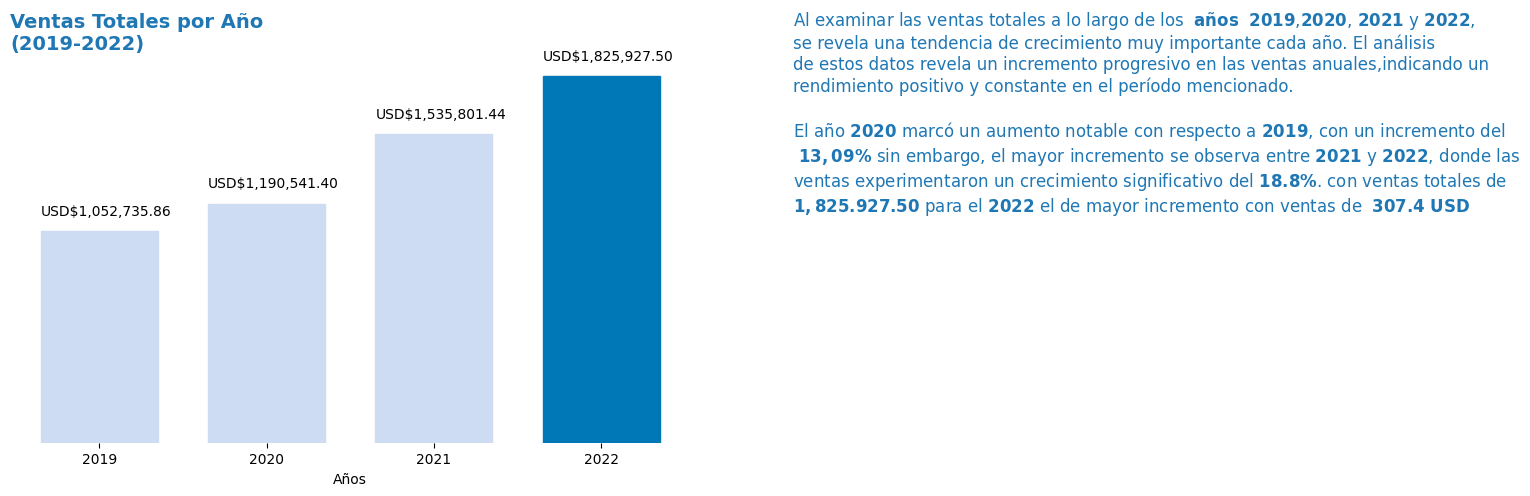

In [984]:
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
fig,ax = plt.subplots(1,2,figsize=(18,5))
fig.subplots_adjust(wspace=0.05)
ax[0].bar(x=df_ventas_años['año'],height=df_ventas_años['total_venta'],width=0.7)
fig.set_label('Ventas Totales')
año_max=df_ventas_años['año'].max()
año_min=df_ventas_años['año'].min()
## Colocamos titulo al primer grafico
ax[0].set_title(f"{'Ventas Totales por Año'}\n({año_min}-{año_max})",loc='left',fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
# Controlar el formato de las etiquetas del eje X
ax[0].set_xticks(df_ventas_años['año'])
ax[0].set_xticklabels(df_ventas_años['año'].astype(int))
##Configuramos las lineas
ax[0].spines['top'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].spines['bottom'].set_color('none')
ax[0].spines['left'].set_color('none')
ax[0].spines['right'].set_color('none')
ax[0].get_yaxis().set_visible(False)
ax[0].set_xlabel('Años')
## Metodo que oculta los ejes
##plt.gca().set_axis_off()
valormay=df_ventas_años['total_venta'].max()
for bar in ax[0].patches:
  qtd=''
  valor = bar.get_height()
  ##Convertimos un string de mejor lectura
  val_conve=locale.currency(valor, grouping=True)
  if(valor==valormay):
   ##print(val_conve)
   ##print('Mayor encontrado')
   bar.set_color('#0077b6')
   #qtd = f"{'USD$'}{valor}\n"
   qtd = f"{'USD'}{val_conve}\n"
   ax[0].text(bar.get_x()-0.35+bar.get_width()/2,valor,qtd)
  else:
      bar.set_color('#CDDBF3')
      ##qtd = f"{'USD$'}{valor}\n"
      qtd = f"{'USD'}{val_conve}\n"
      ax[0].text(bar.get_x()-0.35+bar.get_width()/2,valor,qtd)

 ##Colocamos informacion de analisis
texto = ( "Al examinar las ventas totales a lo largo de los  $\\mathbf{años}$  $\\mathbf{2019}$,$\\mathbf{2020}$, $\\mathbf{2021}$ y $\\mathbf{2022}$,\n"
             "se revela una tendencia de crecimiento muy importante cada año. El análisis\n"
            "de estos datos revela un incremento progresivo en las ventas anuales,indicando un \n"
            "rendimiento positivo y constante en el período mencionado.\n\n"
            "El año $\\mathbf{2020}$ marcó un aumento notable con respecto a $\\mathbf{2019}$, con un incremento del\n"
            " $\\mathbf{13,09\\%}$ sin embargo, el mayor incremento se observa entre $\\mathbf{2021}$ y $\\mathbf{2022}$, donde las\n"
            "ventas experimentaron un crecimiento significativo del $\\mathbf{18.8\\%}$. con ventas totales de \n"
          "$\\mathbf{1,825.927.50}$ para el $\\mathbf{2022}$ el de mayor incremento con ventas de  $\\mathbf{307.4}$ $\\mathbf{USD}$"
            )

ax[1].text(0.1,0.6,texto,ha='left',fontdict = {'fontsize':12, 'color':'tab:blue'})
ax[1].get_yaxis().set_visible(False)
ax[1].get_xaxis().set_visible(False)
ax[1].spines['top'].set_color('none')
ax[1].spines['bottom'].set_color('none')
ax[1].spines['left'].set_color('none')
ax[1].spines['right'].set_color('none')






Pregunta 2

Crea una función pregunta_1(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

In [985]:
def  pregunta_1():
    global df_ventas, df_ventas_limpio
    # Creamos un nuevo df con las columnas de fecha
    df_ventas_años = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()
    # Creamos una nueva columna año
    df_ventas_años['año'] = df_ventas_años['fecha_pedido'].dt.year
    # Eliminamos la columna fecha_pedido
    df_ventas_años.drop(['fecha_pedido'], axis=1, inplace=True)
    # agrupamos por la columna año y sumamos los valores
    df_ventas_años = df_ventas_años.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()
    # graficamos
    # Creamos una lista de colores
    locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
    fig,ax = plt.subplots(1,2,figsize=(18,5))
    fig.subplots_adjust(wspace=0.05)
    ax[0].bar(x=df_ventas_años['año'],height=df_ventas_años['total_venta'],width=0.7)
    fig.set_label('Ventas Totales')
    año_max=df_ventas_años['año'].max()
    año_min=df_ventas_años['año'].min()
    ## Colocamos titulo al primer grafico
    ax[0].set_title(f"{'Ventas Totales por Año'}\n({año_min}-{año_max})",loc='left',fontdict = {'fontsize':14, 'fontweight':'bold','color':'tab:blue'})
    # Controlar el formato de las etiquetas del eje X
    ax[0].set_xticks(df_ventas_años['año'])
    ax[0].set_xticklabels(df_ventas_años['año'].astype(int))
    ##Configuramos las lineas
    ax[0].spines['top'].set_color('none')
    ax[0].spines['top'].set_color('none')
    ax[0].spines['bottom'].set_color('none')
    ax[0].spines['left'].set_color('none')
    ax[0].spines['right'].set_color('none')
    ax[0].get_yaxis().set_visible(False)
    ax[0].set_xlabel('Años')
    ## Metodo que oculta los ejes
    ##plt.gca().set_axis_off()
    valormay=df_ventas_años['total_venta'].max()
    for bar in ax[0].patches:
      qtd=''
      valor = bar.get_height()
      ##Convertimos un string de mejor lectura
      val_conve=locale.currency(valor, grouping=True)
      ## Buscamos el valor mayor para colorear la barra
      if(valor==valormay):
       ##print('Mayor encontrado')
       bar.set_color('#0077b6')
       #qtd = f"{'USD$'}{valor}\n"
       qtd = f"{'USD'}{val_conve}\n"
       ax[0].text(bar.get_x()-0.35+bar.get_width()/2,valor,qtd)
      else:
          bar.set_color('#CDDBF3')
          ##qtd = f"{'USD$'}{valor}\n"
          qtd = f"{'USD'}{val_conve}\n"
          ax[0].text(bar.get_x()-0.35+bar.get_width()/2,valor,qtd)



    ##Colocamos informacion de analisis
    texto = ( "Al examinar las ventas totales a lo largo de los  $\\mathbf{años}$  $\\mathbf{2019}$,$\\mathbf{2020}$, $\\mathbf{2021}$ y $\\mathbf{2022}$,\n"
             "se revela una tendencia de crecimiento muy importante cada año. El análisis\n"
            "de estos datos revela un incremento progresivo en las ventas anuales,indicando un \n"
            "rendimiento positivo y constante en el período mencionado.\n\n"
            "El año $\\mathbf{2020}$ marcó un aumento notable con respecto a $\\mathbf{2019}$, con un incremento del\n"
            " $\\mathbf{13,09\\%}$ sin embargo, el mayor incremento se observa entre $\\mathbf{2021}$ y $\\mathbf{2022}$, donde las\n"
            "ventas experimentaron un crecimiento significativo del $\\mathbf{18.8\\%}$. con ventas totales de \n"
          "$\\mathbf{1,825.927.50}$ para el $\\mathbf{2022}$ el de mayor incremento con ventas de  $\\mathbf{307.4}$ $\\mathbf{USD}$"
            )

    ax[1].text(0.1,0.6,texto,ha='left',fontdict = {'fontsize':12, 'color':'tab:blue'})
    ax[1].get_yaxis().set_visible(False)
    ax[1].get_xaxis().set_visible(False)
    ax[1].spines['top'].set_color('none')
    ax[1].spines['bottom'].set_color('none')
    ax[1].spines['left'].set_color('none')
    ax[1].spines['right'].set_color('none')



1. Preparación de los datos:

Crea una copia de la base df_ventas_limpio en un nuevo dataframe df_top_ganancias y guarda unicamente las columnas 'tipo_producto' y 'total_ganancia'.

In [986]:
##Copia de dataframe
df_top_ganancias=df_ventas_limpio[['tipo_producto','total_ganancia']].copy()

In [987]:
df_top_ganancias

,tipo_producto,total_ganancia
0,Camisetas,71.26
1,Jeans,373.29
2,Toallitas desinfectantes,11.68
3,Papel higiénico,4.28
4,Vestidos,24.08
...,...,...
7205,Smartphones,25.88
7206,Smartphones,48.96
7207,Cámaras digitales,94.60
7208,Vestidos,6.96


Agrupacion por tipo de producto

In [988]:
df_top_ganancias=df_top_ganancias.groupby("tipo_producto").aggregate({'total_ganancia':'sum'}).reset_index()

In [989]:
print(df_top_ganancias)

               tipo_producto  total_ganancia
0       Ambientador en spray        40976.16
1           Bolsas de basura        53328.46
2                  Camisetas        14182.38
3           Cepillos de baño         1436.84
4          Cámaras digitales        80192.63
..                       ...             ...
12           Papel higiénico        43546.05
13               Smartphones        64705.58
14  Toallitas desinfectantes         8865.09
15                  Vestidos        29784.63
16                Zapatillas        21546.88

[17 rows x 2 columns]


In [990]:
## Funcion que ordena los valores de forma ascendente
df_top_ganancias.sort_values("total_ganancia",axis = 0, ascending = True,inplace = True, na_position ='first')

In [991]:
df_top_ganancias.tail(7)

,tipo_producto,total_ganancia
1,Bolsas de basura,53328.46
6,Detergente para ropas,55766.39
7,Jeans,55982.95
13,Smartphones,64705.58
4,Cámaras digitales,80192.63
8,Laptops,91148.67
11,Lámparas LED,111453.41


In [992]:
## Mostramos el TOP 7 forma 1
df_top_ganancias=df_top_ganancias.tail(7)

El top de 7 ganancias

In [993]:
## Forma 2 de extraer los 7 primeros o el top de ganancias
df_top_ganancias=df_top_ganancias[0:7]

## Forma 1 df_top_ganancias=df_top_ganancias.head(7)

In [994]:
print(df_top_ganancias)

            tipo_producto  total_ganancia
1        Bolsas de basura        53328.46
6   Detergente para ropas        55766.39
7                   Jeans        55982.95
13            Smartphones        64705.58
4       Cámaras digitales        80192.63
8                 Laptops        91148.67
11           Lámparas LED       111453.41


Graficamos

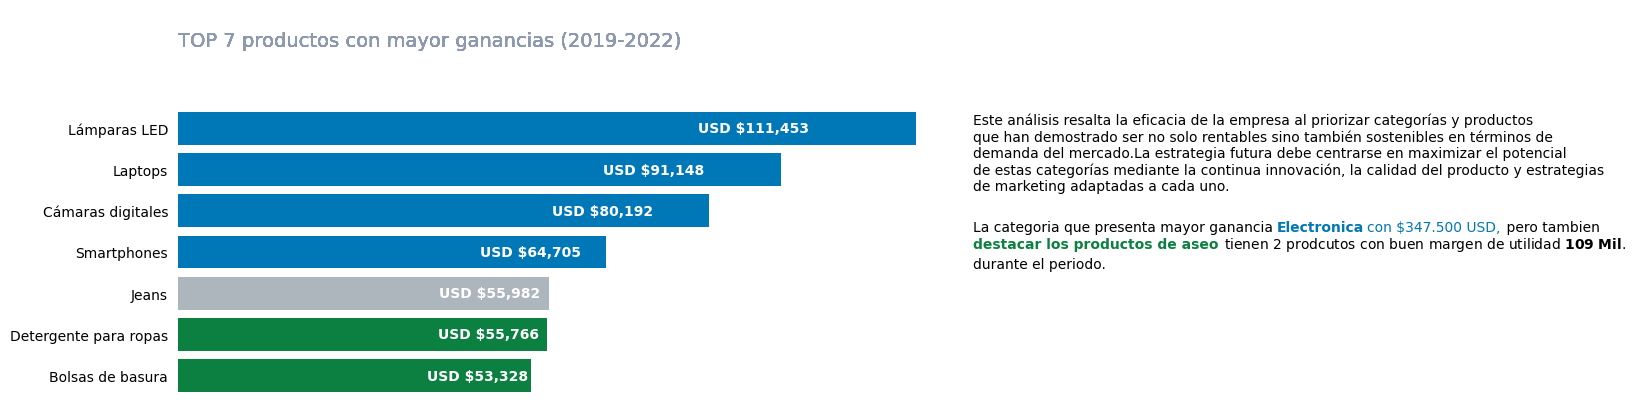

In [995]:
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
fig,ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(wspace=0.05)
colores=["#0C8040","#0C8040","#adb5bd","#0077b6","#0077b6","#0077b6","#0077b6"]
ax.barh(df_top_ganancias['tipo_producto'],df_top_ganancias['total_ganancia'],color=colores)
for i,valor in enumerate(df_top_ganancias['total_ganancia'].astype(int)):
  val_conve=locale.currency(valor, grouping=True).replace('.00', '')
  qtd = f"{'USD '}{val_conve}"
  ax.text(valor/1.42,i-0.1,qtd,color='white',fontweight='bold')
  ax.text(0,8,"\nTOP 7 productos con mayor ganancias (2019-2022)",fontsize=14,color='#8d99ae')

# Informe como una cadena de texto con saltos de línea
# Informe como una cadena de texto con saltos de línea
conclucion=("Este análisis resalta la eficacia de la empresa al priorizar categorías y productos \n"
             "que han demostrado ser no solo rentables sino también sostenibles en términos de \n"
             "demanda del mercado.La estrategia futura debe centrarse en maximizar el potencial \n"
             "de estas categorías mediante la continua innovación, la calidad del producto y estrategias\n"
             "de marketing adaptadas a cada uno.")

ax.text(120000,4.5,conclucion,fontsize=10)
ax.text(120000,3.5,"La categoria que presenta mayor ganancia",fontsize=10)
ax.text(166000,3.5,"Electronica",fontsize=10,color='#0077b6',fontweight='bold')
ax.text(179500,3.5,"con $347.500 USD,",fontsize=10,color='#0077b6')
ax.text(198000,3.5,"    pero tambien",fontsize=10)
ax.text(120000,3.1,"destacar los productos de aseo",fontsize=10,color='#0C8040',fontweight='bold')
ax.text(140000,3.1,"                           tienen 2 prodcutos con buen margen de utilidad $\\mathbf{109}$ $\\mathbf{Mil}$.",fontsize=10)
ax.text(120000,2.6,"durante el periodo.",fontsize=10)
##Configuramos las lineas
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
##  Con esto eliminamos señalizaciones
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

4. Creamos funcion pregunta_2()

In [996]:
def pregunta_2():
  global df_ventas, df_ventas_limpio
  ##Copia de dataframe
  df_top_ganancias=df_ventas_limpio[['tipo_producto','total_ganancia']].copy()
  ##Agupamos por tipo de producto sumando las ganancia
  df_top_ganancias=df_top_ganancias.groupby("tipo_producto").aggregate({'total_ganancia':'sum'}).reset_index()
  ## Funcion que ordena los valores
  df_top_ganancias.sort_values("total_ganancia",axis = 0, ascending = True,inplace = True, na_position ='first')
  ## Mostramos el TOP 7 forma 1
  df_top_ganancias=df_top_ganancias.tail(7)
  locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
  fig,ax = plt.subplots(figsize=(10,4))
  fig.subplots_adjust(wspace=0.05)
  colores=["#0C8040","#0C8040","#adb5bd","#0077b6","#0077b6","#0077b6","#0077b6"]
  ax.barh(df_top_ganancias['tipo_producto'],df_top_ganancias['total_ganancia'],color=colores)

  for i,valor in enumerate(df_top_ganancias['total_ganancia'].astype(int)):
    val_conve=locale.currency(valor, grouping=True).replace('.00', '')
    qtd = f"{'USD '}{val_conve}"
    ax.text(valor/1.42,i-0.1,qtd,color='white',fontweight='bold')
    ax.text(0,8,"\nTOP 7 productos con mayor ganancias (2019-2022)",fontsize=14,color='#8d99ae')

  # Informe como una cadena de texto con saltos de línea
  conclucion=("Este análisis resalta la eficacia de la empresa al priorizar categorías y productos \n"
             "que han demostrado ser no solo rentables sino también sostenibles en términos de \n"
             "demanda del mercado.La estrategia futura debe centrarse en maximizar el potencial \n"
             "de estas categorías mediante la continua innovación, la calidad del producto y estrategias de\n"
             "marketing adaptadas a cada uno.")

  ax.text(120000,4.5,conclucion,fontsize=10)
  ax.text(120000,3.5,"La categoria que presenta mayor ganancia",fontsize=10)
  ax.text(166000,3.5,"Electronica",fontsize=10,color='#0077b6',fontweight='bold')
  ax.text(179500,3.5,"con $347.500 USD,",fontsize=10,color='#0077b6')
  ax.text(198000,3.5,"    pero tambien",fontsize=10)
  ax.text(120000,3.1,"destacar los productos de aseo",fontsize=10,color='#0C8040',fontweight='bold')
  ax.text(140000,3.1,"                           tienen 2 prodcutos con buen margen de utilidad $\\mathbf{109}$ $\\mathbf{Mil}$.",fontsize=10)
  ax.text(120000,2.6,"durante el periodo.",fontsize=10)
  ##Configuramos las lineas
  ax.get_xaxis().set_visible(False)
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ##  Con esto eliminamos señalizaciones
  ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)


In [997]:
##Copia de dataframe limpio
df_ventas_año_region=df_ventas_limpio[['fecha_pedido','region','total_venta']].copy()

In [998]:
print(df_ventas_año_region)

     fecha_pedido   region  total_venta
0      2021-11-09  Sureste       890.66
1      2021-11-09  Sureste      2488.59
2      2021-06-13  Sureste        49.72
3      2020-10-12      Sur        76.04
4      2019-06-10  Sureste       166.11
...           ...      ...          ...
7205   2021-09-30  Sureste       123.22
7206   2022-11-18  Noreste       271.97
7207   2022-11-18  Noreste       700.75
7208   2019-01-22  Noreste        85.83
7209   2022-05-05  Noreste       826.74

[7210 rows x 3 columns]


In [999]:
## Creamos columna años y extraemos solo el año de la columna pedido
df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year

In [1000]:
df_ventas_año_region

,fecha_pedido,region,total_venta,año
0,2021-11-09,Sureste,890.66,2021
1,2021-11-09,Sureste,2488.59,2021
2,2021-06-13,Sureste,49.72,2021
3,2020-10-12,Sur,76.04,2020
4,2019-06-10,Sureste,166.11,2019
...,...,...,...,...
7205,2021-09-30,Sureste,123.22,2021
7206,2022-11-18,Noreste,271.97,2022
7207,2022-11-18,Noreste,700.75,2022
7208,2019-01-22,Noreste,85.83,2019


In [1001]:
## Borramos la columna fecha_pedido
df_ventas_año_region.drop('fecha_pedido',axis=1,inplace=True)

In [1002]:
df_ventas_año_region

,region,total_venta,año
0,Sureste,890.66,2021
1,Sureste,2488.59,2021
2,Sureste,49.72,2021
3,Sur,76.04,2020
4,Sureste,166.11,2019
...,...,...,...
7205,Sureste,123.22,2021
7206,Noreste,271.97,2022
7207,Noreste,700.75,2022
7208,Noreste,85.83,2019


In [1003]:
## Usar pd.crosstab
df_ventas_año_region=pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'], values = df_ventas_año_region['total_venta'], aggfunc='sum')

In [1004]:
## Ordenamos la informacion
df_ventas_año_region=df_ventas_año_region[['Sureste','Noreste','Centro-Oeste','Norte','Sur']]

In [1005]:
df_ventas_año_region

region,Sureste,Noreste,Centro-Oeste,Norte,Sur
año,,,,,
2019,522953.51,346407.40,67406.37,71778.74,44189.84
2020,648732.79,282431.39,90616.80,107309.38,61451.04
2021,870894.51,359829.92,125344.52,69534.02,110198.47
2022,980404.44,549254.20,97679.64,99195.86,99393.36


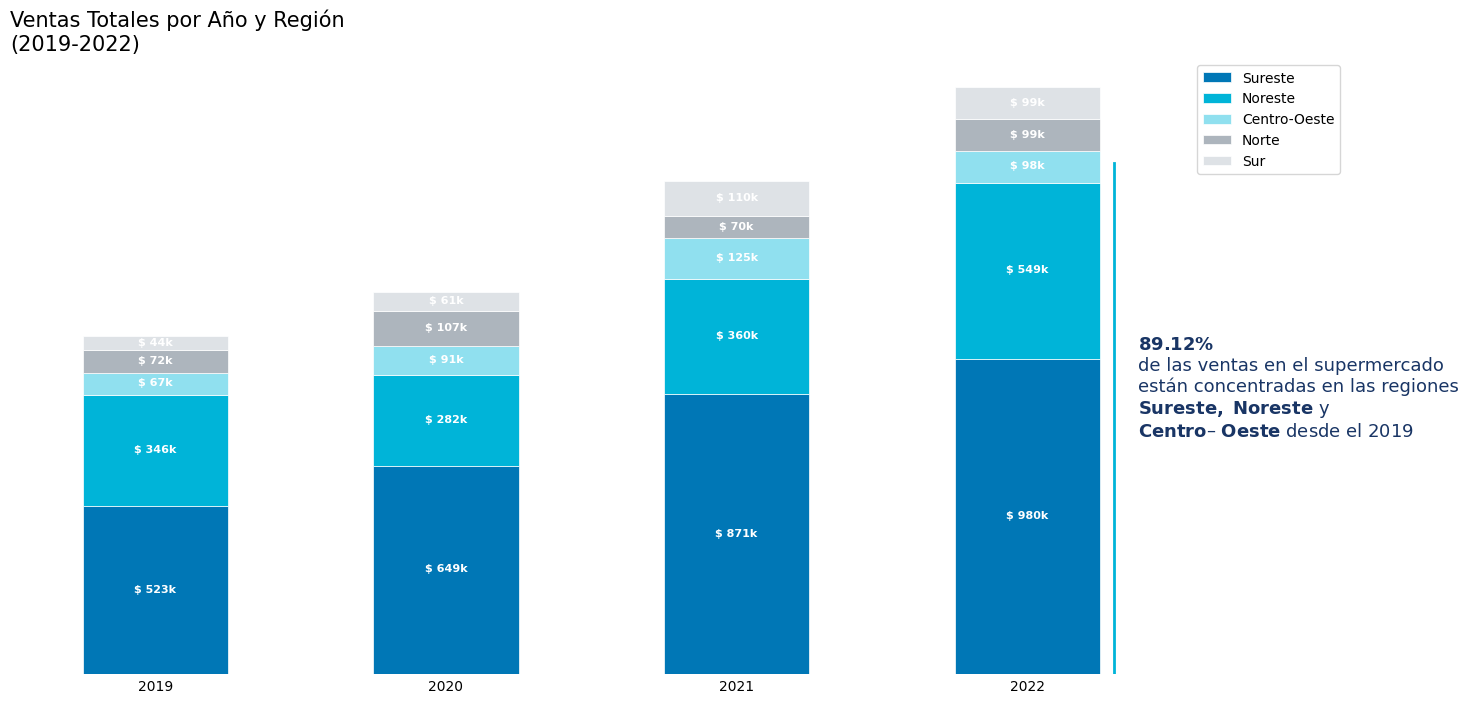

In [1006]:
# Creamos una lista de colores
colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']

# Crear el gráfico de columnas apiladas con bordes más visibles
ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores, edgecolor='white', linewidth=0.5)

# Quitar la palabra "Año" en el eje x
ax.set_xlabel("")

# Quitar los ticks y etiquetas del eje y
ax.get_yaxis().set_visible(False)

# Añadir etiquetas a las barras
for container in ax.containers:
    for i, bar in enumerate(container.patches):
        height = bar.get_height()
        if height > 0:  # Asegurarse de que hay un valor para mostrar
            label = f"$ {height / 1000:.0f}k"  # Formatear el valor en formato de miles
            x_position = bar.get_x() + bar.get_width() / 2
            y_position = bar.get_y() + height / 2
            ax.annotate(label,
                        xy=(x_position, y_position),
                        xytext=(0, 1),  # Distancia vertical desde el punto
                        textcoords="offset points",
                        ha='center', va='center',  # Colocar el texto en el centro
                        fontsize=8, fontweight='bold', color='white')  # Añadir negrita al texto

# Configuracion del titulo
ax.set_title('Ventas Totales por Año y Región\n(2019-2022)', loc='left', fontsize=15,  color='black')  # Mover el título a la izquierda

# Rotar los años horizontalmente
plt.xticks(rotation=0)

# Mover la etiqueta de la región a la izquierda y ajustar la posición
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

# Texto debajo del gráfico  $\\mathbf{mayor}$ $\\mathbf{ganancia}$    $\\mathbf{2022}$
# Texto
texto = ("$\\mathbf{89.12\\%}$ \nde las ventas en el supermercado\n"
         "están concentradas en las regiones\n"
         "$\\mathbf{Sureste,}$ $\\mathbf{ Noreste}$ y\n"
         "$\\mathbf{Centro – }$ $\\mathbf{Oeste}$ desde el 2019")


# Añadir texto y alinear a la izquierda
ax.text(0.97, 0.38, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='#193565')

# Línea vertical de color azul
ax.axvline(x=3.3, ymin=0.0, ymax=0.83, color='#00b4d8', linestyle='-', linewidth=2)

# Ocultar todos los bordes del gráfico
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Quitar los ticks del eje X y Y
ax.tick_params(axis='both', which='both', length=0)

# Mostrar el gráfico
plt.show()

graficoraul="""
colores=["#0077b6","#00b4d8", "#90e0ef", "#adb5bd", "#dee2e6"]
ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15,8), color=colores)
##  Con esto eliminamos señalizaciones
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,rotation=0)
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
##ax.spines['right'].set_color('none')
ax.spines['right'].set(linewidth=3, color='#0077b6')
## Tamaño de linea
ax.spines.right.set_bounds(0,1400000)
## Eliminamos X Label año
ax.set_xlabel('')
## Movemos la leyenda
ax.legend(bbox_to_anchor=(1.15,1))
ax.text(0,150000*12,"Ventas Supermercado por región\n(2019-2022)",fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
for container in ax.containers:
  #Convertir a texto y adicionar símbolo de $ al inicio
  ax.bar_label(container, label_type='center',color='white',fontweight='bold')
"""



In [1007]:
# sumamos las ventas de las regiones Sureste, Noreste y Centro-Oeste para cada año
df_ventas_concentradas = df_ventas_año_region[['Sureste', 'Noreste', 'Centro-Oeste']].sum(axis=1)

# claculamos el porcentaje con respecto al total de ventas
total_ventas = df_ventas_año_region.sum(axis=1)
porcentaje_concentradas = (df_ventas_concentradas / total_ventas) * 100

print(f"Porcentaje de ventas concentradas en Sureste, Noreste y Centro-Oeste desde 2019: {porcentaje_concentradas.iloc[-1]:.2f}%")

Porcentaje de ventas concentradas en Sureste, Noreste y Centro-Oeste desde 2019: 89.12%


In [1008]:
def pregunta_3():
    global df_ventas, df_ventas_limpio
    ##Copia de dataframe limpio
    df_ventas_año_region=df_ventas_limpio[['fecha_pedido','region','total_venta']].copy()
    ## Creamos columna años y extraemos solo el año de la columna pedido
    df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year
    ## Borramos la columna fecha_pedido
    df_ventas_año_region.drop('fecha_pedido',axis=1,inplace=True)
    ## Usar pd.crosstab
    df_ventas_año_region=pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'], values = df_ventas_año_region['total_venta'], aggfunc='sum')
    ## Ordenamos la informacion
    df_ventas_año_region=df_ventas_año_region[['Sureste','Noreste','Centro-Oeste','Norte','Sur']]
    # Creamos una lista de colores
    colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']

    # Crear el gráfico de columnas apiladas con bordes más visibles
    ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores, edgecolor='white', linewidth=0.5)

    # Quitar la palabra "Año" en el eje x
    ax.set_xlabel("")

    # Quitar los ticks y etiquetas del eje y
    ax.get_yaxis().set_visible(False)

    # Añadir etiquetas a las barras
    for container in ax.containers:
        for i, bar in enumerate(container.patches):
            height = bar.get_height()
            if height > 0:  # Asegurarse de que hay un valor para mostrar
                label = f"$ {height / 1000:.0f}k"  # Formatear el valor en formato de miles
                x_position = bar.get_x() + bar.get_width() / 2
                y_position = bar.get_y() + height / 2
                ax.annotate(label,
                            xy=(x_position, y_position),
                            xytext=(0, 1),  # Distancia vertical desde el punto
                            textcoords="offset points",
                            ha='center', va='center',  # Colocar el texto en el centro
                            fontsize=8, fontweight='bold', color='white')  # Añadir negrita al texto

    # Configuracion del titulo
    ax.set_title('Ventas Totales por Año y Región\n(2019-2022)', loc='left', fontsize=15,  color='black')  # Mover el título a la izquierda

    # Rotar los años horizontalmente
    plt.xticks(rotation=0)

    # Mover la etiqueta de la región a la izquierda y ajustar la posición
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

    # Texto debajo del gráfico  $\\mathbf{mayor}$ $\\mathbf{ganancia}$    $\\mathbf{2022}$
    # Texto
    texto = ("$\\mathbf{89.12\\%}$ \nde las ventas en el supermercado\n"
            "están concentradas en las regiones\n"
            "$\\mathbf{Sureste,}$ $\\mathbf{ Noreste}$ y\n"
            "$\\mathbf{Centro – }$ $\\mathbf{Oeste}$ desde el 2019")


    # Añadir texto y alinear a la izquierda
    ax.text(0.97, 0.38, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='#193565')

    # Línea vertical de color azul
    ax.axvline(x=3.3, ymin=0.0, ymax=0.83, color='#00b4d8', linestyle='-', linewidth=2)

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Quitar los ticks del eje X y Y
    ax.tick_params(axis='both', which='both', length=0)

    # Mostrar el gráfico
    plt.show()
    # Mostrar el gráfico





### 6. Pregunta 4: ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

### 6.1 Creamos una copia de df_ventas_limpio y Guardamos solo las columnas modo_envio y segmento_cliente

In [1009]:
# Creamos una copia de df_ventas_limpio
df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()
# Guardamos solo las columnas modo_envio y segmento_cliente
df_modo_envio

,modo_envio,segmento_cliente
0,Económico,B2C
1,Económico,B2C
2,Económico,B2B
3,Entrega estándar,B2C
4,Entrega estándar,B2C
...,...,...
7205,Entrega estándar,B2C
7206,Entrega estándar,B2B
7207,Entrega estándar,B2B
7208,Económico,B2C


In [1010]:
# Generamos una tabla cruzada
df_modo_envio = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")
df_modo_envio


segmento_cliente,B2B,B2C
modo_envio,,
24 horas,171,231
Envío rápido,543,542
Económico,707,755
Entrega estándar,2048,2213


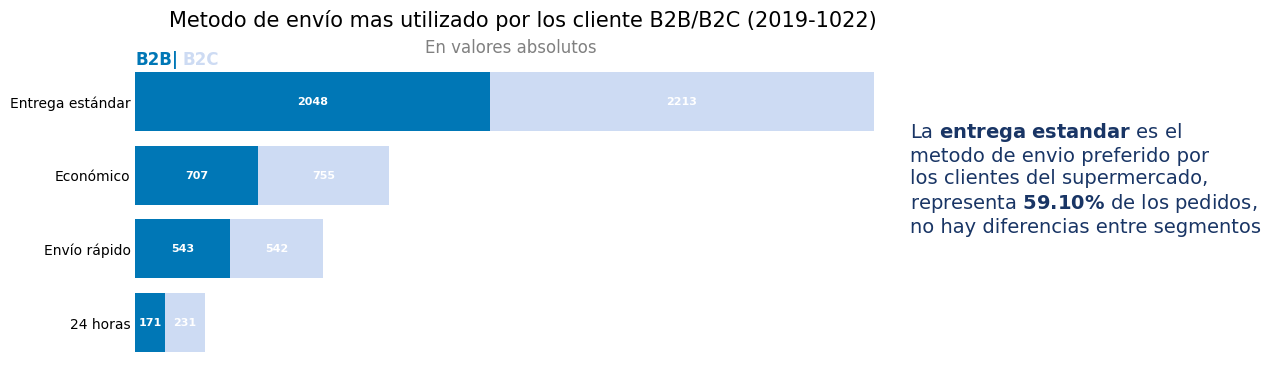

In [1011]:
# Creamos una lista de colores
colores = ['#0077b6', '#CDDBF3']

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 4))
fig.subplots_adjust(wspace=0.05)
# Crear el gráfico de barras horizontales
bars_b2b = ax.barh(df_modo_envio.index, df_modo_envio['B2B'], color=colores[0])
bars_b2c = ax.barh(df_modo_envio.index, df_modo_envio['B2C'], left=df_modo_envio['B2B'], color=colores[1])

# Añadir etiquetas dentro de cada barra
for bar in bars_b2b:
    label_x_position = bar.get_x() + bar.get_width() / 2
    label_y_position = bar.get_y() + bar.get_height() / 2
    label_value = f"{bar.get_width():.0f}"
    ax.text(label_x_position, label_y_position, label_value,
            ha='center', va='center', color='white', fontsize=8, fontweight='bold')

for bar in bars_b2c:
    label_x_position = bar.get_x() + bar.get_width() / 2
    label_y_position = bar.get_y() + bar.get_height() / 2
    label_value = f"{bar.get_width():.0f}"
    ax.text(label_x_position, label_y_position, label_value,
            ha='center', va='center', color='white', fontsize=8, fontweight='bold')


# Configuracion del titulo
ax.set_title('Metodo de envío mas utilizado por los cliente B2B/B2C (2019-1022)\n', loc='center', fontsize=15, color='black')
plt.suptitle('\nEn valores absolutos\n',color='gray')
# Mover la leyenda a la parte superior y ajustar el espaciado
#ax.legend(['B2B | B2C'], loc='upper left')

#leyenda con el valor de segmentos de clientes
ax.text(0, 3.5, 'B2B|', fontsize=12, fontweight='bold', color=colores[0])
ax.text(270, 3.5, 'B2C', fontsize=12, fontweight='bold', color=colores[1])

# Ocultar todos los bordes del gráfico
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Quitar etiquetas del eje x
ax.set_xticks([])


# Texto $\\mathbf{2022}$
texto = ("La $\\mathbf{entrega}$ $\\mathbf{estandar}$ es el\n"
         "metodo de envio preferido por\n"
        "los clientes del supermercado,\n"
        "representa $\\mathbf{59.10\\%}$ de los pedidos,\n"
        "no hay diferencias entre segmentos\n"
         )


# Añadir texto y alinear
ax.text(1.0, 0.35, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=14, color='#193565')
# Quitar los ticks del eje X y Y
ax.tick_params(axis='both', which='both', length=0)

# Mostrar el gráfico
plt.show()


In [1012]:
# calculamos el porcentaje de entrega estándar
porcentaje_entrega_estandar = (df_modo_envio['B2B'] + df_modo_envio['B2C']).loc['Entrega estándar'] / df_modo_envio[['B2B', 'B2C']].sum().sum() * 100

print(f"El método de entrega estándar representa el {porcentaje_entrega_estandar:.2f}% de los pedidos.")

El método de entrega estándar representa el 59.10% de los pedidos.


In [1013]:
def pregunta_4():
  global df_ventas, df_ventas_limpio
  # Creamos una copia de df_ventas_limpio
  df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()
  # Generamos una tabla cruzada
  df_modo_envio = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")
  # Creamos una lista de colores
  colores = ['#0077b6', '#CDDBF3']

  # Crear la figura y el eje
  fig, ax = plt.subplots(figsize=(10, 4))
  fig.subplots_adjust(wspace=0.05)
  # Crear el gráfico de barras horizontales
  bars_b2b = ax.barh(df_modo_envio.index, df_modo_envio['B2B'], color=colores[0])
  bars_b2c = ax.barh(df_modo_envio.index, df_modo_envio['B2C'], left=df_modo_envio['B2B'], color=colores[1])

  # Añadir etiquetas dentro de cada barra
  for bar in bars_b2b:
      label_x_position = bar.get_x() + bar.get_width() / 2
      label_y_position = bar.get_y() + bar.get_height() / 2
      label_value = f"{bar.get_width():.0f}"
      ax.text(label_x_position, label_y_position, label_value,
              ha='center', va='center', color='white', fontsize=8, fontweight='bold')

  for bar in bars_b2c:
      label_x_position = bar.get_x() + bar.get_width() / 2
      label_y_position = bar.get_y() + bar.get_height() / 2
      label_value = f"{bar.get_width():.0f}"
      ax.text(label_x_position, label_y_position, label_value,
              ha='center', va='center', color='white', fontsize=8, fontweight='bold')


  # Configuracion del titulo
  ax.set_title('Metodo de envío mas utilizado por los cliente B2B/B2C (2019-1022)\n', loc='center', fontsize=15, color='black')
  plt.suptitle('\nEn valores absolutos\n',color='gray')
  # Mover la leyenda a la parte superior y ajustar el espaciado
  #ax.legend(['B2B | B2C'], loc='upper left')

  #leyenda con el valor de segmentos de clientes
  ax.text(0, 3.5, 'B2B|', fontsize=12, fontweight='bold', color=colores[0])
  ax.text(270, 3.5, 'B2C', fontsize=12, fontweight='bold', color=colores[1])

  # Ocultar todos los bordes del gráfico
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)

  # Quitar etiquetas del eje x
  ax.set_xticks([])


  # Texto $\\mathbf{2022}$
  texto = ("La $\\mathbf{entrega}$ $\\mathbf{estandar}$ es el\n"
            "metodo de envio preferido por\n"
            "los clientes del supermercado,\n"
            "representa $\\mathbf{59.10\\%}$ de los pedidos,\n"
            "no hay diferencias entre segmentos\n"
            )


  # Añadir texto y alinear
  ax.text(1.0, 0.35, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=14, color='#193565')
  # Quitar los ticks del eje X y Y
  ax.tick_params(axis='both', which='both', length=0)

  # Mostrar el gráfico
  plt.show()

7 Pregunta 5: ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?


7.1 Creamos una copia y filtramos los registros, seleccionamos las columnas fecha_pedido y total_venta y establecemos la columna fecha_pedido como índice

In [1014]:
# Creamos una copia y filtramos los registros
df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'].copy()

# Seleccionamos las columnas fecha_pedido y total_venta
df_ventas_sp = df_ventas_sp[['fecha_pedido', 'total_venta']]

# Establecemos la columna fecha_pedido como índice
df_ventas_sp.set_index('fecha_pedido', inplace=True)

df_ventas_sp.head()

,total_venta
fecha_pedido,
2021-11-09,890.66
2021-11-09,2488.59
2019-11-12,2263.98
2022-09-11,500.36
2019-10-21,720.64


In [1015]:
df_ventas_sp.dtypes

total_venta    float64
dtype: object

### 7.2 Con resample agrupamos las ventas por trimestre ('Q') y sumamos los valores en forma trimestral

In [1016]:
# agrupamos las ventas por trimestre ('Q') y sumamos los valores en forma trimestral
# df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')
df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')

# Agrupa las ventas por trimestre y suma los valores
df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')
df_ventas_sp

<ipython-input-1016-468d49c7b49c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')


,total_venta
fecha_pedido,
2019-03-31,27377.18
2019-06-30,33951.90
2019-09-30,90208.89
2019-12-31,124093.79
2020-03-31,26732.22
...,...
2021-12-31,236502.75
2022-03-31,61785.08
2022-06-30,74727.59


### 7.3 Redondear la columna total_venta a la escala de miles

In [1017]:
# Redondear la columna total_venta a la escala de miles
df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].round()

# Formatear la columna total_venta para mostrarla en miles con dos decimales
df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].apply(lambda x: f'{x/1000:.2f}')

df_ventas_sp


,total_venta
fecha_pedido,
2019-03-31,27.38
2019-06-30,33.95
2019-09-30,90.21
2019-12-31,124.09
2020-03-31,26.73
...,...
2021-12-31,236.50
2022-03-31,61.78
2022-06-30,74.73


In [1018]:
# Convertir la columna total_venta a tipo numérico
df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'])

In [1019]:
df_ventas_sp.dtypes

total_venta    float64
dtype: object

### 7.4 eliminamos el índice existente y creamos uno nuevo, el parámetro drop=True evita que se agregue una columna adicional con el índice anterior

In [1020]:
# Restablecer el índice y mantener la columna 'fecha_pedido'
df_ventas_sp = df_ventas_sp.reset_index()
df_ventas_sp


,fecha_pedido,total_venta
0,2019-03-31,27.38
1,2019-06-30,33.95
2,2019-09-30,90.21
3,2019-12-31,124.09
4,2020-03-31,26.73
...,...,...
11,2021-12-31,236.50
12,2022-03-31,61.78
13,2022-06-30,74.73
14,2022-09-30,144.52


In [1021]:
df_ventas_sp

,fecha_pedido,total_venta
0,2019-03-31,27.38
1,2019-06-30,33.95
2,2019-09-30,90.21
3,2019-12-31,124.09
4,2020-03-31,26.73
...,...,...
11,2021-12-31,236.50
12,2022-03-31,61.78
13,2022-06-30,74.73
14,2022-09-30,144.52


### 7.5 Visualizacion

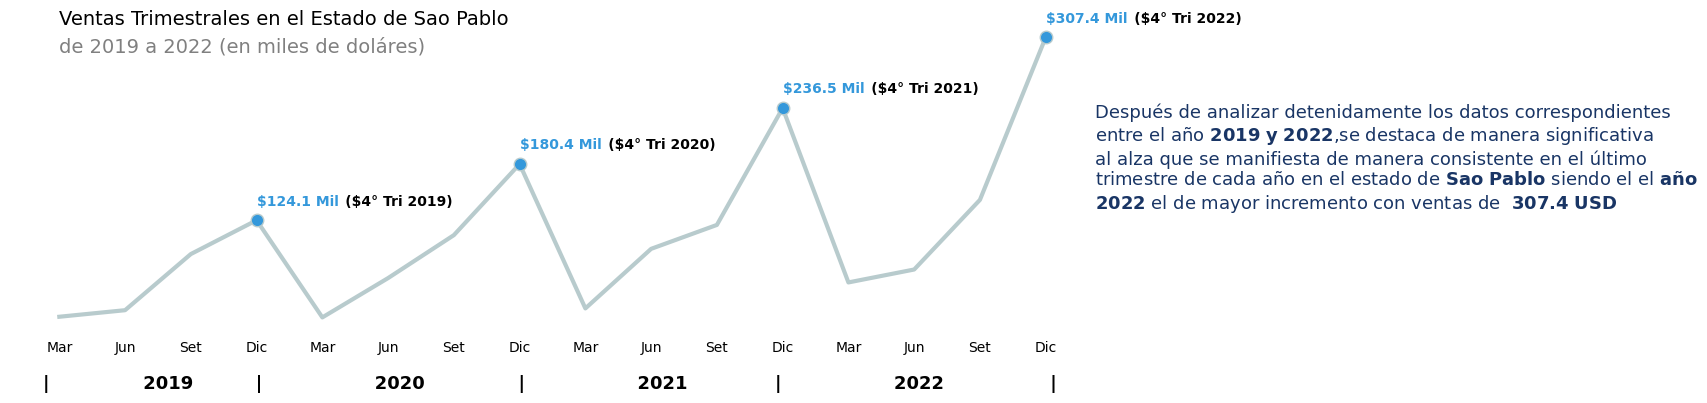

In [1022]:
# Configuración de la figura y el eje
fig, ax = plt.subplots(figsize=(14, 4))

# Crear el gráfico de líneas
puntos_a_marcar = [False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True]
ax.plot(df_ventas_sp.index, df_ventas_sp['total_venta'], marker="o",markerfacecolor='#3498db',markersize=9,markevery=puntos_a_marcar,color='#b8cbcd', linewidth=3)
# Reemplazar las fechas en el eje X por el nombre del mes
x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
ax.set_xticks(df_ventas_sp.index)
ax.set_xticklabels(x_labels, ha="center")
años_comp=["4° Tri 2019","4° Tri 2020","4° Tri 2021","4° Tri 2022"]
# Colocar valores solo en el 4to Trimestre
for i in range(3, len(df_ventas_sp), 4):
    max_value = df_ventas_sp['total_venta'][i:i+4].max()
    max_index = df_ventas_sp['total_venta'][i:i+4].idxmax()
    ax.text(max_index, max_value + 15, f"${max_value:,.1f} Mil", ha='left',color='#3498db',fontweight='bold')
    if i==3 :
       ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-3]})", ha='left',fontweight='bold')
    elif i==7:
       ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-6]})", ha='left',fontweight='bold')
    elif i==11:
       ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-9]})", ha='left',fontweight='bold')
    elif i==15:
       ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-12]})", ha='left',fontweight='bold')

    # Configuramos el titulo
ax.text(0,320,'Ventas Trimestrales en el Estado de Sao Pablo',fontsize=14, color='black')
ax.text(0,292,'de 2019 a 2022 (en miles de doláres)',fontsize=14, color='gray')
#ax.set_xlabel('Trimestre')
#ax.set_ylabel('Total de Ventas ($)')
texto = ("Después de analizar detenidamente los datos correspondientes\n"
          "entre el año $\\mathbf{2019}$ $\\mathbf{y}$ $\\mathbf{2022}$,se destaca de manera significativa\n"
          "al alza que se manifiesta de manera consistente en el último\n"
          "trimestre de cada año en el estado de $\\mathbf{Sao}$ $\\mathbf{Pablo}$ siendo el el $\\mathbf{año}$\n"
          "$\\mathbf{2022}$ el de mayor incremento con ventas de  $\\mathbf{307.4}$ $\\mathbf{USD}$"
            )


    # Añadir texto y alinear a la izquierda
ax.text(1, 0.38, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='#193565')
# Ocultar todos los bordes del gráfico
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# Ocultar etiquetas del eje y
ax.set_yticks([])

# Texto
textos = ("|               2019          |                  2020               |                  2021              |                  2022                 |")

# Añadir texto y alinear
ax.text(0.03, -0.2, textos, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='black',fontweight='bold')

# Mostrar el gráfico
plt.show()

In [1023]:
def pregunta_5():
  global df_ventas, df_ventas_limpio
  # Creamos una copia y filtramos los registros
  df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'].copy()

  # Seleccionamos las columnas fecha_pedido y total_venta
  df_ventas_sp = df_ventas_sp[['fecha_pedido', 'total_venta']]

  # Establecemos la columna fecha_pedido como índice
  df_ventas_sp.set_index('fecha_pedido', inplace=True)

  # agrupamos las ventas por trimestre ('Q') y sumamos los valores en forma trimestral
  # df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')
  df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')

  # Agrupa las ventas por trimestre y suma los valores
  df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')

  # Redondear la columna total_venta a la escala de miles
  df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].round()

  # Formatear la columna total_venta para mostrarla en miles con dos decimales
  df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].apply(lambda x: f'{x/1000:.2f}')

  # Convertir la columna total_venta a tipo numérico
  df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'])

  # Restablecer el índice y mantener la columna 'fecha_pedido'
  df_ventas_sp = df_ventas_sp.reset_index()

  # Configuración de la figura y el eje
  fig, ax = plt.subplots(figsize=(14, 4))

  # Crear el gráfico de líneas
  puntos_a_marcar = [False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True]
  ax.plot(df_ventas_sp.index, df_ventas_sp['total_venta'], marker="o",markerfacecolor='#3498db',markersize=9,markevery=puntos_a_marcar,color='#b8cbcd', linewidth=3)
  # Reemplazar las fechas en el eje X por el nombre del mes
  x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
  ax.set_xticks(df_ventas_sp.index)
  ax.set_xticklabels(x_labels, ha="center")
  años_comp=["4° Tri 2019","4° Tri 2020","4° Tri 2021","4° Tri 2022"]
  # Colocar valores solo en el 4to Trimestre
  for i in range(3, len(df_ventas_sp), 4):
      max_value = df_ventas_sp['total_venta'][i:i+4].max()
      max_index = df_ventas_sp['total_venta'][i:i+4].idxmax()
      ax.text(max_index, max_value + 15, f"${max_value:,.1f} Mil", ha='left',color='#3498db',fontweight='bold')
      if i==3 :
        ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-3]})", ha='left',fontweight='bold')
      elif i==7:
        ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-6]})", ha='left',fontweight='bold')
      elif i==11:
        ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-9]})", ha='left',fontweight='bold')
      elif i==15:
        ax.text(max_index+0.9, max_value + 15, f"      (${años_comp[i-12]})", ha='left',fontweight='bold')

      # Configuramos el titulo
  ax.text(0,320,'Ventas Trimestrales en el Estado de Sao Pablo',fontsize=14, color='black')
  ax.text(0,292,'de 2019 a 2022 (en miles de doláres)',fontsize=14, color='gray')
  #ax.set_xlabel('Trimestre')
  #ax.set_ylabel('Total de Ventas ($)')
  texto = ("Después de analizar detenidamente los datos correspondientes\n"
          "entre el año $\\mathbf{2019}$ $\\mathbf{y}$ $\\mathbf{2022}$,se destaca de manera significativa\n"
          "al alza que se manifiesta de manera consistente en el último\n"
          "trimestre de cada año en el estado de $\\mathbf{Sao}$ $\\mathbf{Pablo}$ siendo el $\\mathbf{año}$\n"
          "$\\mathbf{2022}$ el de mayor incremento con ventas de  $\\mathbf{307.4}$ $\\mathbf{USD}$"
            )


      # Añadir texto y alinear a la izquierda
  ax.text(1, 0.38, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='#193565')
  # Ocultar todos los bordes del gráfico
  ax.spines['top'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)

  ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
  # Ocultar etiquetas del eje y
  ax.set_yticks([])

  # Texto
  textos = ("|               2019          |                  2020               |                  2021              |                  2022                 |")

  # Añadir texto y alinear
  ax.text(0.03, -0.2, textos, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='black',fontweight='bold')

  # Mostrar el gráfico
  plt.show()
7

7

### 8. Clientes que mas compras han realizado

In [1024]:
# agrupamos por el nombre del cliente y sumamos el valor de la venta
compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

# ordenamos en orden descendente
compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=False)

In [1025]:
# agrupamos por el nombre del cliente y sumamos el valor de la venta
compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

# ordenamos en orden descendente
compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=False)

# seleccionamos  los 10 primeros clientes
top_10_clientes = compras_por_cliente.head(10)


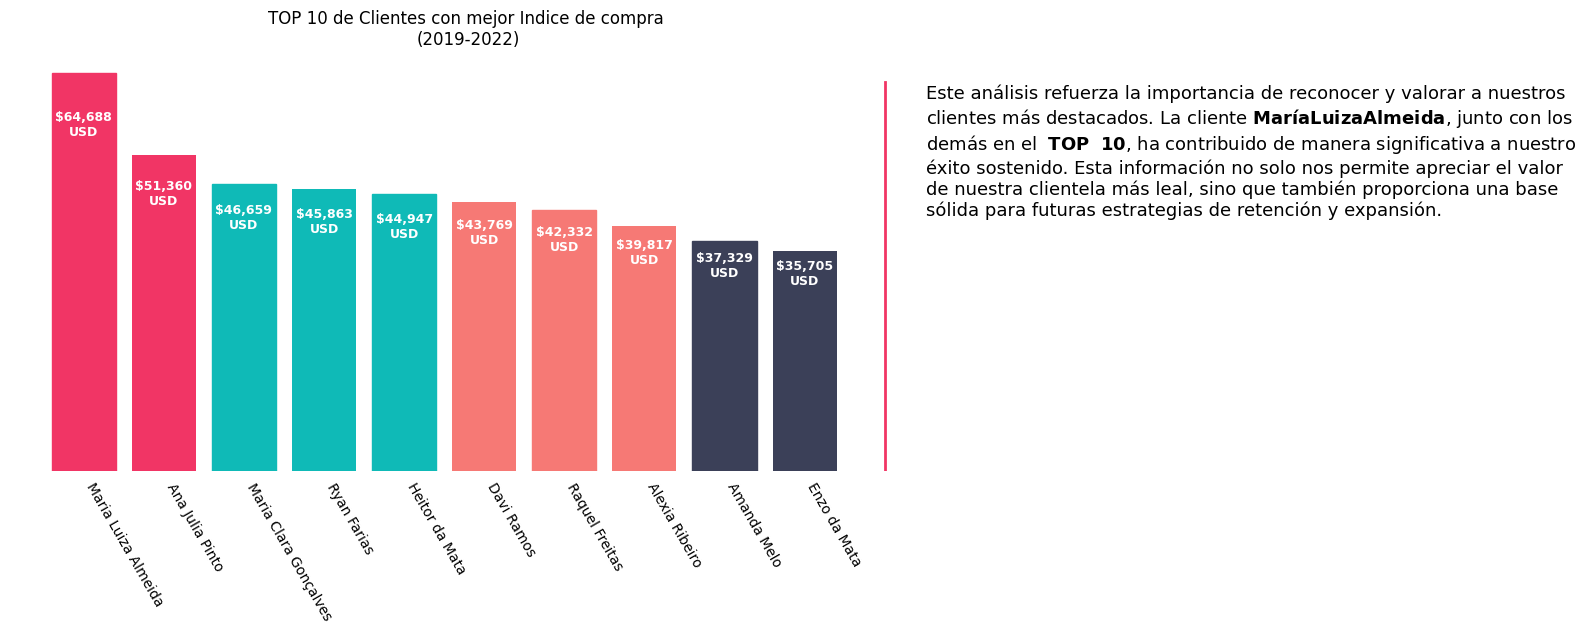

In [1026]:
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
colores = ['#f13565', '#f13565', '#0fbab7', '#0fbab7', '#0fbab7', '#f67975', '#f67975', '#f67975', '#3b4058', '#3b4058']
# graficamos
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_10_clientes['nombre_cliente'], top_10_clientes['total_venta'].astype(int), color=colores)

# Agrega los valores en las barras
for bar in bars:
    yval =int(bar.get_height())
    val_conve=locale.currency(yval, grouping=True).replace('00', '')
    syval=f"${yval:,.0f}\nUSD"  ##round(yval, 2)
    plt.text(bar.get_x()+ bar.get_width()/2, yval/1.2, syval, ha='center', va='bottom', fontsize=9,color='white',fontweight='bold')

##plt.xlabel('Clientes')
##plt.ylabel('Total de Ventas')

# Cambia los colores de las barras
for i, bar in enumerate(bars):
    if i % 2 == 0:
        bar.set_color(colores[i])

plt.xticks(rotation=300, ha='left')
plt.tight_layout()
ax.set_title("TOP 10 de Clientes con mejor Indice de compra \n(2019-2022)")
# Ocultar todos los bordes del gráfico
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
# Ocultar etiquetas del eje y
ax.set_yticks([])
texto = ("Este análisis refuerza la importancia de reconocer y valorar a nuestros\n"
          "clientes más destacados. La cliente $\\mathbf{María Luiza Almeida}$, junto con los \n"
          "demás en el  $\\mathbf{TOP}$  $\\mathbf{10}$, ha contribuido de manera significativa a nuestro\n"
          "éxito sostenido. Esta información no solo nos permite apreciar el valor\n"
          "de nuestra clientela más leal, sino que también proporciona una base\n"
          "sólida para futuras estrategias de retención y expansión."
            )

 # Añadir texto y alinear a la izquierda
ax.text(1, 0.6, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13)
# Línea vertical de color azul
ax.axvline(x=10, ymin=0.0, ymax=0.93, color='#f13565', linestyle='-', linewidth=2)
plt.show()


In [1027]:
def pregunta_6():
   global df_ventas, df_ventas_limpio
   # agrupamos por el nombre del cliente y sumamos el valor de la venta
   compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

   # ordenamos en orden descendente
   compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=False)
   # agrupamos por el nombre del cliente y sumamos el valor de la venta
   compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

   # ordenamos en orden descendente
   compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=False)

   # seleccionamos  los 10 primeros clientes
   top_10_clientes = compras_por_cliente.head(10)
   locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
   colores = ['#f13565', '#f13565', '#0fbab7', '#0fbab7', '#0fbab7', '#f67975', '#f67975', '#f67975', '#3b4058', '#3b4058']
    # graficamos
   fig, ax = plt.subplots(figsize=(10, 6))
   bars = ax.bar(top_10_clientes['nombre_cliente'], top_10_clientes['total_venta'].astype(int), color=colores)

    # Agrega los valores en las barras
   for bar in bars:
        yval =int(bar.get_height())
        val_conve=locale.currency(yval, grouping=True).replace('00', '')
        syval=f"${yval:,.0f}\nUSD"  ##round(yval, 2)
        plt.text(bar.get_x()+ bar.get_width()/2, yval/1.2, syval, ha='center', va='bottom', fontsize=9,color='white',fontweight='bold')

    ##plt.xlabel('Clientes')
    ##plt.ylabel('Total de Ventas')

    # Cambia los colores de las barras
   for i, bar in enumerate(bars):
        if i % 2 == 0:
            bar.set_color(colores[i])

   plt.xticks(rotation=300, ha='left')
   plt.tight_layout()
   ax.set_title("TOP 10 de Clientes con mejor Indice de compra \n(2019-2022)")
   # Ocultar todos los bordes del gráfico
   ax.spines['top'].set_visible(False)
   ax.spines['bottom'].set_visible(False)
   ax.spines['left'].set_visible(False)
   ax.spines['right'].set_visible(False)

   ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
   # Ocultar etiquetas del eje y
   ax.set_yticks([])
   texto = ("Este análisis refuerza la importancia de reconocer y valorar a nuestros\n"
              "clientes más destacados. La cliente $\\mathbf{María Luiza Almeida}$, junto con los \n"
              "demás en el  $\\mathbf{TOP}$  $\\mathbf{10}$, ha contribuido de manera significativa a nuestro\n"
              "éxito sostenido. Esta información no solo nos permite apreciar el valor\n"
              "de nuestra clientela más leal, sino que también proporciona una base\n"
              "sólida para futuras estrategias de retención y expansión."
                )


   # Añadir texto y alinear a la izquierda
   ax.text(1, 0.6, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13)
    # Línea vertical de color azul
   ax.axvline(x=10, ymin=0.0, ymax=0.93, color='#f13565', linestyle='-', linewidth=2)
   plt.show()


**9. Productos con menos margen de gananancias TOP 8**

---



In [1028]:
##Copia de dataframe
df_top_ganancias_min=df_ventas_limpio[['tipo_producto','total_ganancia']].copy()

In [1029]:
##Agupamos por tipo de producto sumando las ganancia
df_top_ganancias_min=df_top_ganancias_min.groupby("tipo_producto").aggregate({'total_ganancia':'sum'}).reset_index()


In [1030]:
df_top_ganancias_min

,tipo_producto,total_ganancia
0,Ambientador en spray,40976.16
1,Bolsas de basura,53328.46
2,Camisetas,14182.38
3,Cepillos de baño,1436.84
4,Cámaras digitales,80192.63
...,...,...
12,Papel higiénico,43546.05
13,Smartphones,64705.58
14,Toallitas desinfectantes,8865.09
15,Vestidos,29784.63


In [1031]:
## Funcion que ordena los valores
df_top_ganancias_min.sort_values("total_ganancia",axis = 0, ascending = False,inplace = True, na_position ='last')

In [1032]:
df_top_ganancias_min

,tipo_producto,total_ganancia
11,Lámparas LED,111453.41
8,Laptops,91148.67
4,Cámaras digitales,80192.63
13,Smartphones,64705.58
7,Jeans,55982.95
...,...,...
9,Limpiacristales,11254.88
10,Limpiador de inodoros,9939.43
14,Toallitas desinfectantes,8865.09
5,Detergente para platos,2859.87


In [1033]:
## Mostramos el TOP 8 forma de los menos vendidos
df_top_ganancias_min=df_top_ganancias_min.tail(8)

In [1034]:
df_top_ganancias_min

,tipo_producto,total_ganancia
15,Vestidos,29784.63
16,Zapatillas,21546.88
2,Camisetas,14182.38
9,Limpiacristales,11254.88
10,Limpiador de inodoros,9939.43
14,Toallitas desinfectantes,8865.09
5,Detergente para platos,2859.87
3,Cepillos de baño,1436.84


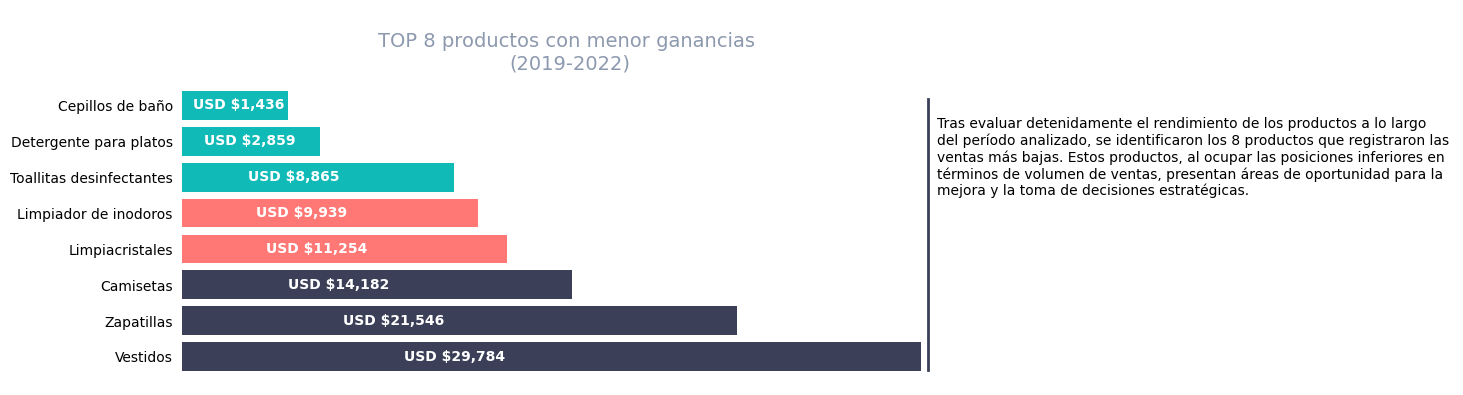

In [1035]:
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
fig,ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(wspace=0.05)
colores=["#3b4058","#3b4058","#3b4058","#ff7876","#ff7876","#0fbab7","#0fbab7","#0fbab7"]
ax.barh(df_top_ganancias_min['tipo_producto'],df_top_ganancias_min['total_ganancia']+3300,color=colores)

for i,valor in enumerate(df_top_ganancias_min['total_ganancia'].astype(int)):
    val_conve=locale.currency(valor, grouping=True).replace('.00', '')
    qtd = f"{'USD '}{val_conve}"
    ax.text(valor/3,i-0.1,qtd,color='white',fontweight='bold')
    ax.set_title("\nTOP 8 productos con menor ganancias \n(2019-2022)",fontsize=14,color='#8d99ae',ha='center')
   ## ax.text(0,8,"\nTOP 8 productos con menor ganancias \n(2019-2022)",fontsize=14,color='#8d99ae',ha='center')

# Informe como una cadena de texto con saltos de línea
conclucion=("Tras evaluar detenidamente el rendimiento de los productos a lo largo  \n"
             "del período analizado, se identificaron los 8 productos que registraron las \n"
             "ventas más bajas. Estos productos, al ocupar las posiciones inferiores en  \n"
             "términos de volumen de ventas, presentan áreas de oportunidad para la\n"
             "mejora y la toma de decisiones estratégicas.")

ax.text(33800,4.5,conclucion,fontsize=10,ha='left')
##Configuramos las lineas
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
# Línea vertical de color azul
ax.axvline(x=33400, ymin=0.05, ymax=0.93, color='#3b4058', linestyle='-', linewidth=2)
 ##  Con esto eliminamos señalizaciones
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)


In [1036]:
def pregunta_7():
    global df_ventas,df_ventas_limpio
    ##Copia de dataframe
    df_top_ganancias_min=df_ventas_limpio[['tipo_producto','total_ganancia']].copy()
    ##Agupamos por tipo de producto sumando las ganancia
    df_top_ganancias_min=df_top_ganancias_min.groupby("tipo_producto").aggregate({'total_ganancia':'sum'}).reset_index()
    ## Funcion que ordena los valores
    df_top_ganancias_min.sort_values("total_ganancia",axis = 0, ascending = False,inplace = True, na_position ='last')
    ## Mostramos el TOP 8 forma de los menos vendidos
    df_top_ganancias_min=df_top_ganancias_min.tail(8)
    locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')
    fig,ax = plt.subplots(figsize=(10,4))
    fig.subplots_adjust(wspace=0.05)
    colores=["#3b4058","#3b4058","#3b4058","#ff7876","#ff7876","#0fbab7","#0fbab7","#0fbab7"]
    ax.barh(df_top_ganancias_min['tipo_producto'],df_top_ganancias_min['total_ganancia']+3300,color=colores)

    for i,valor in enumerate(df_top_ganancias_min['total_ganancia'].astype(int)):
        val_conve=locale.currency(valor, grouping=True).replace('.00', '')
        qtd = f"{'USD '}{val_conve}"
        ax.text(valor/3,i-0.1,qtd,color='white',fontweight='bold')
        ax.set_title("\nTOP 8 productos con menor ganancias \n(2019-2022)",fontsize=14,color='#8d99ae',ha='center')
      ## ax.text(0,8,"\nTOP 8 productos con menor ganancias \n(2019-2022)",fontsize=14,color='#8d99ae',ha='center')

    # Informe como una cadena de texto con saltos de línea
    conclucion=("Tras evaluar detenidamente el rendimiento de los productos a lo largo  \n"
                "del período analizado, se identificaron los 8 productos que registraron las \n"
                "ventas más bajas. Estos productos, al ocupar las posiciones inferiores en  \n"
                "términos de volumen de ventas, presentan áreas de oportunidad para la\n"
                "mejora y la toma de decisiones estratégicas.")

    ax.text(33800,4.5,conclucion,fontsize=10,ha='left')
    ##Configuramos las lineas
    ax.get_xaxis().set_visible(False)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    # Línea vertical de color azul
    ax.axvline(x=33400, ymin=0.05, ymax=0.93, color='#3b4058', linestyle='-', linewidth=2)
    ##  Con esto eliminamos señalizaciones
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

### 9. Ejecucion de cada una de las funciones creadas

In [1037]:
obtencion_datos()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           8954 non-null   datetime64[ns]
 1   fecha_envio            8954 non-null   datetime64[ns]
 2   modo_envio             8954 non-null   object        
 3   nombre_cliente         8952 non-null   object        
 4   segmento_cliente       8954 non-null   object        
 5   ciudad                 8954 non-null   object        
 6   estado                 8954 non-null   object        
 7   region                 8954 non-null   object        
 8   departamento_producto  8954 non-null   object        
 9   tipo_producto          8954 non-null   object        
 10  precio_base            8954 non-null   float64       
 11  precio_unit_sin_desc   8954 non-null   float64       
 12  descuento              8954 non-null   float64       
 13  pre

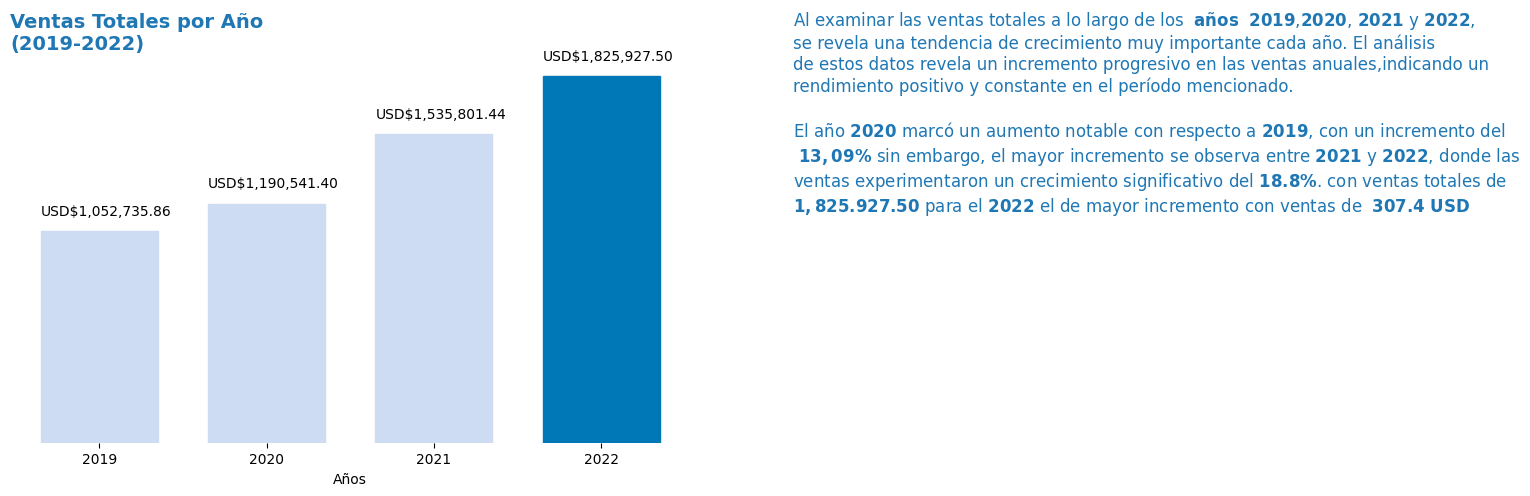

In [1038]:
pregunta_1()

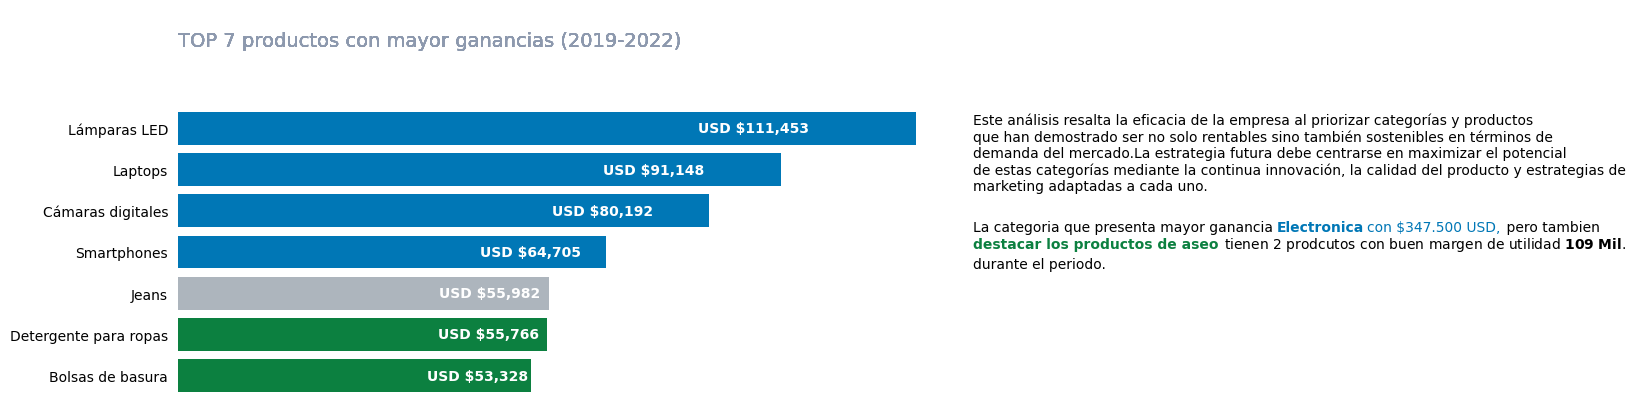

In [1039]:
pregunta_2()

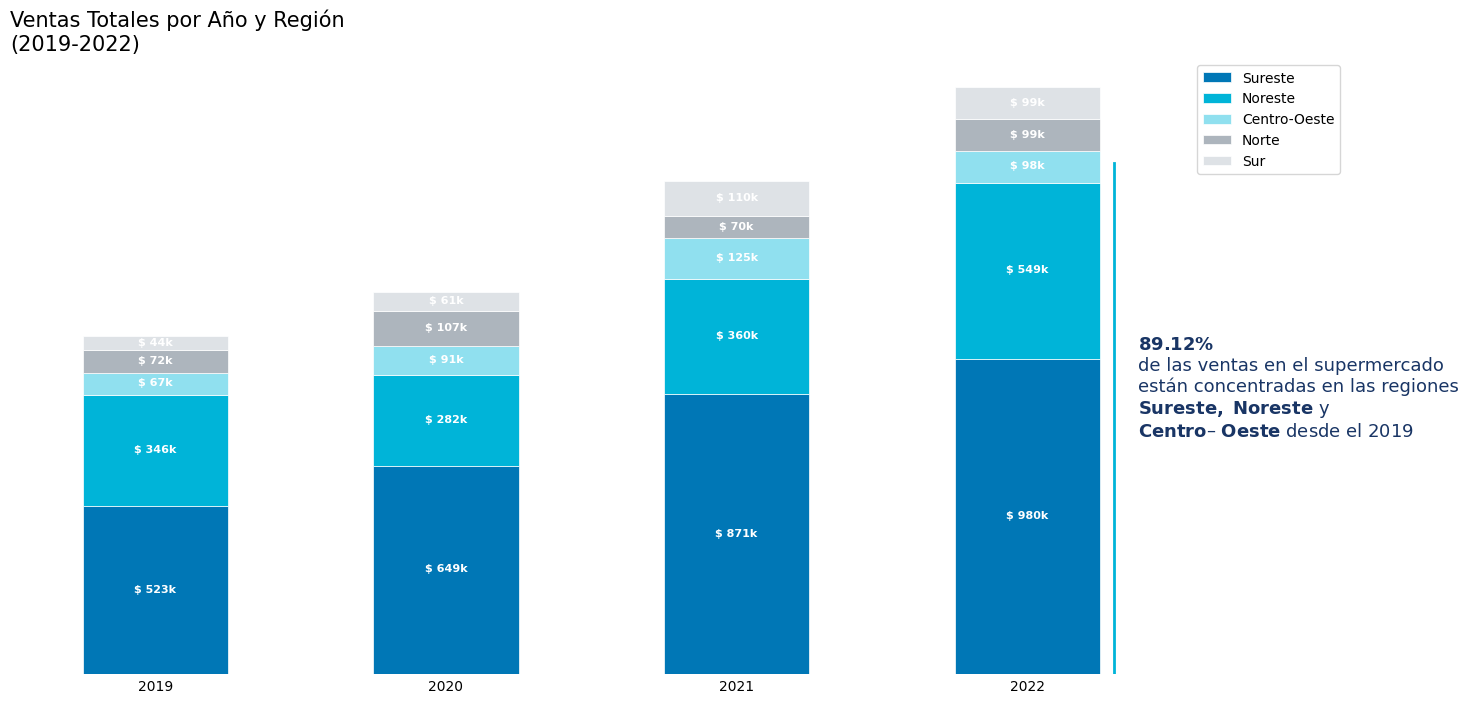

In [1040]:
pregunta_3()

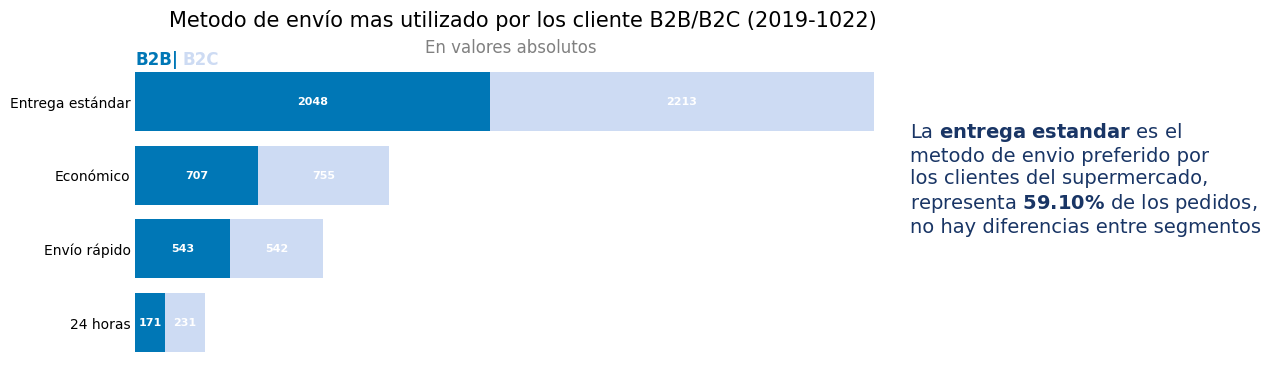

In [1041]:
pregunta_4()

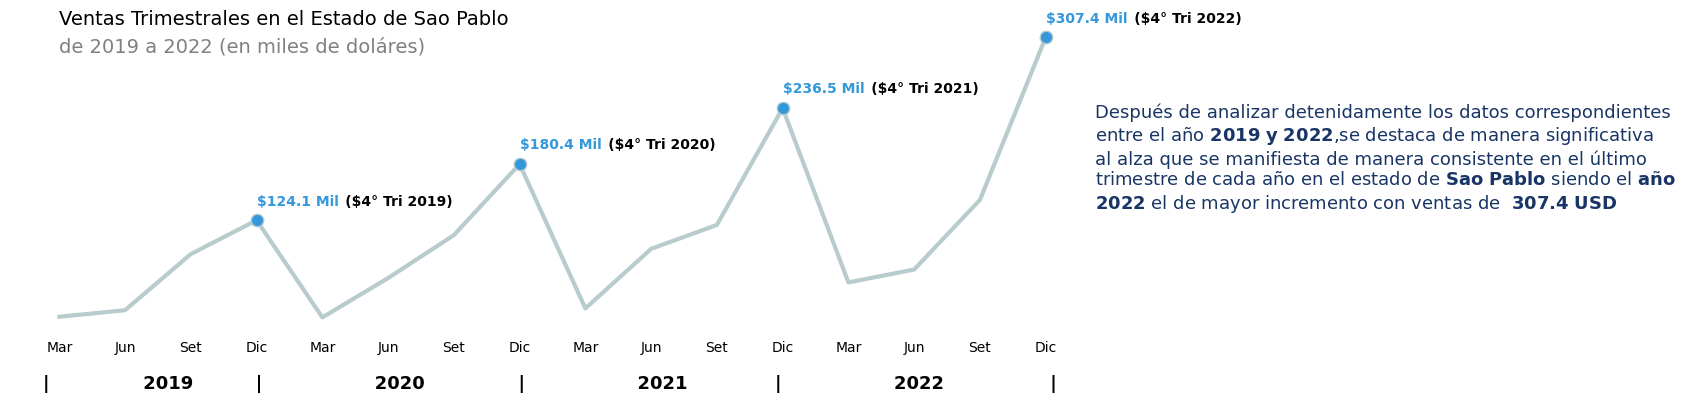

In [1042]:
pregunta_5()

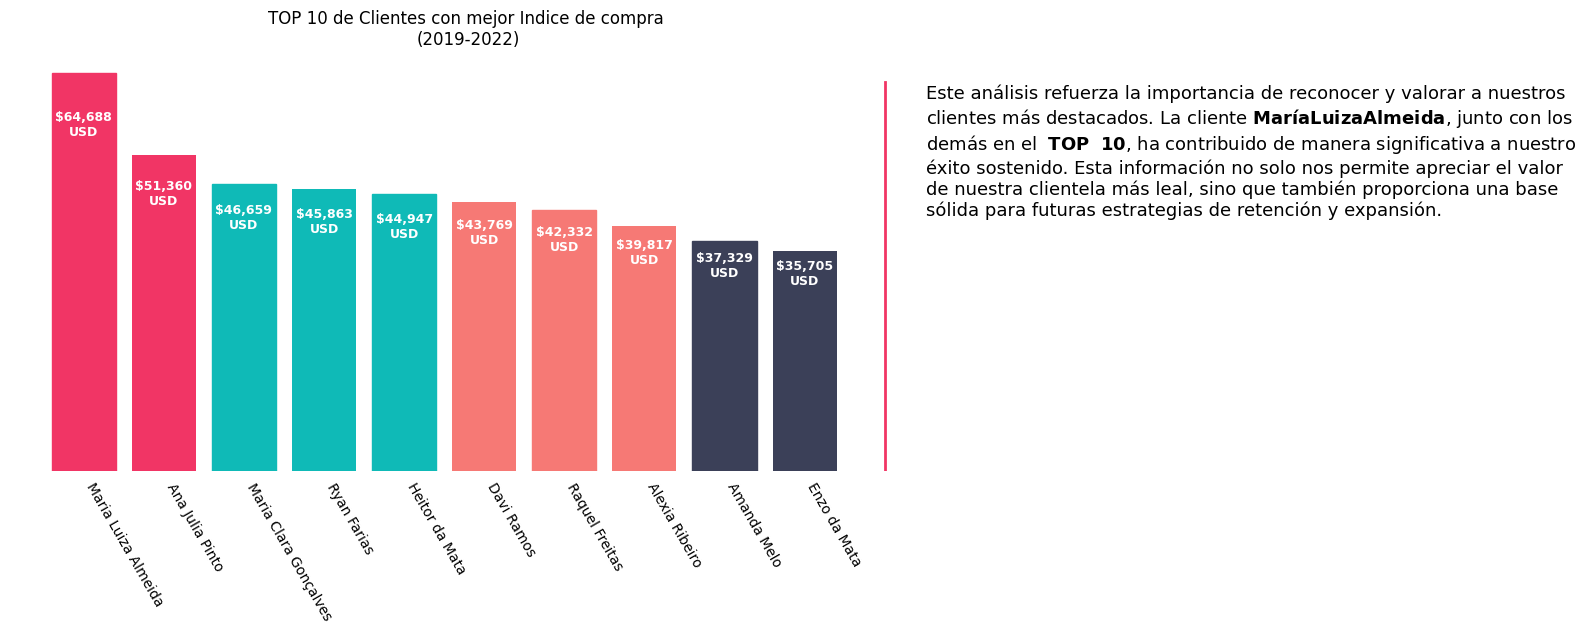

In [1043]:
pregunta_6()

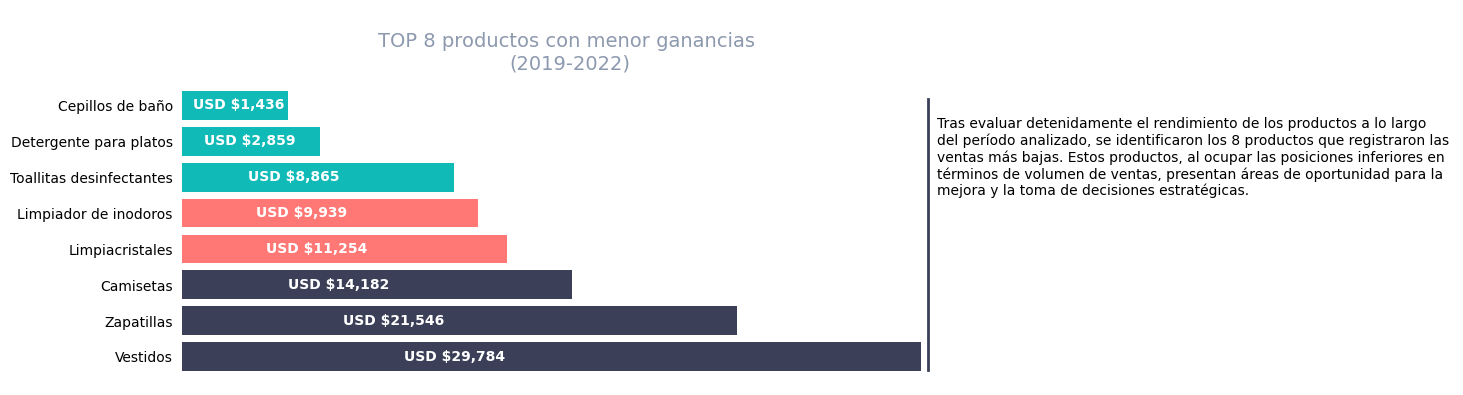

In [1044]:
pregunta_7()